<a href="https://colab.research.google.com/github/mayankjain281/SQL_Vehical_Store/blob/main/Analysing_Vehicle_Model_Sales_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Index** 
- Introduction
- Reading the data
- Questions to solve
- Supply and Profit
- Customer Loyalty
- Countries Contribution
- Favorite Category
- Monthly Profits Performance
- Salemen performance
- Dead Stocks to remove
- Recommendations
- Conclusion


## Introduction

![image.png](https://mycustomhotwheels.com/wp-content/uploads/2019/01/HIN-Hot-Wheels-Diorama-15-1080x675.jpg)
*Source*:[mycustomhotwheels](https://mycustomhotwheels.com/hotwheels-at-hin2018/)

**Vehicle Models Company is a fictitious wholesale distributor of die cast models of vehicles ranging from vintage cars to planes. They have customers in more than 15 countries around the world.**

**The company has asked us to go over their dataset and analyse the same to make some essential decisions related to potential future expansion.**

**The goal of this project is to go over the questions that they have and extract answers based on the data.**



## Reading the data

In [2]:
import sqlite3
my_conn = sqlite3.connect('stores.db')

In [5]:
import pandas as pd

In [7]:
qry = """

SELECT * FROM customers

"""
df = pd.read_sql_query(qry, my_conn)
df.info()

# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerNumber          122 non-null    int64  
 1   customerName            122 non-null    object 
 2   contactLastName         122 non-null    object 
 3   contactFirstName        122 non-null    object 
 4   phone                   122 non-null    object 
 5   addressLine1            122 non-null    object 
 6   addressLine2            22 non-null     object 
 7   city                    122 non-null    object 
 8   state                   49 non-null     object 
 9   postalCode              115 non-null    object 
 10  country                 122 non-null    object 
 11  salesRepEmployeeNumber  100 non-null    float64
 12  creditLimit             122 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 12.5+ KB


In [8]:
qry = """

SELECT name FROM sqlite_master WHERE type='table'

"""
df = pd.read_sql_query(qry, my_conn)
df

,name
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


In [12]:
qry = """

SELECT 'customers' AS Table_Names,13 AS Number_of_Attributes,(SELECT COUNT(*) FROM customers) AS Number_of_Rows
UNION ALL
SELECT 'products',9,(SELECT COUNT(*) FROM products)
UNION ALL
SELECT 'productLines',4,(SELECT COUNT(*) FROM productlines)
UNION ALL
SELECT 'orders',7,(SELECT COUNT(*) FROM orders)
UNION ALL
SELECT 'orderDetails',5,(SELECT COUNT(*) FROM orderdetails)
UNION ALL
SELECT 'payments',4,(SELECT COUNT(*) FROM payments)
UNION ALL
SELECT 'employees',8,(SELECT COUNT(*) FROM employees)
UNION ALL
SELECT 'offices',9,(SELECT COUNT(*) FROM offices)

"""
df = pd.read_sql_query(qry, my_conn)
df.sort_values('Number_of_Rows', ascending=False)

# There are 110 types of products
# There are 122 customers
# There are 7 offices
# There are 23 employees

,Table_Names,Number_of_Attributes,Number_of_Rows
4,orderDetails,5,2996
3,orders,7,326
5,payments,4,273
0,customers,13,122
1,products,9,110
6,employees,8,23
2,productLines,4,7
7,offices,9,7


In [13]:
qry = """

SELECT * FROM customers

"""
df = pd.read_sql_query(qry, my_conn)
df.info()

# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerNumber          122 non-null    int64  
 1   customerName            122 non-null    object 
 2   contactLastName         122 non-null    object 
 3   contactFirstName        122 non-null    object 
 4   phone                   122 non-null    object 
 5   addressLine1            122 non-null    object 
 6   addressLine2            22 non-null     object 
 7   city                    122 non-null    object 
 8   state                   49 non-null     object 
 9   postalCode              115 non-null    object 
 10  country                 122 non-null    object 
 11  salesRepEmployeeNumber  100 non-null    float64
 12  creditLimit             122 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 12.5+ KB


In [14]:
qry = """

SELECT * FROM customers

"""
df = pd.read_sql_query(qry, my_conn)
df.duplicated().sum()

# No missing values

0

In [16]:
df.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700


The company has a number of offices and each office has multiple employees. Every customer is associated to a sales rep. whose employee ID is recorded in the salesRepEmployeeNumber column of the Customer table.

The company has many products that are categorised in to product lines. Every incoming order lists certain order specific details related to a product and those details are listed in the OrderDetails table. The orders associated to the items in the OrderDetails table are separately tracked in the Orders table.

The status column in the order tracks the progress of the order from when it is received to when it is shipped out. The different status' of an order has been listed below.

Once the order is shipped out, customers seem to be paying for their orders in a cumulative manner. Customers have the option of utilising credit based on the CreditLimit column the in the Customer table. While going over the comments column of the Orders table it was noticed that an order can be put on hold if a user has gone beyond their credit limit for a particular order. The order is processed only after the payment is cleared.

In [17]:
qry = """

SELECT status AS Order_Status,COUNT(status) AS Number_of_Orders
  FROM orders
 GROUP BY status
 ORDER BY Number_of_Orders DESC

"""
df = pd.read_sql_query(qry, my_conn)
df

,Order_Status,Number_of_Orders
0,Shipped,303
1,In Process,6
2,Cancelled,6
3,Resolved,4
4,On Hold,4
5,Disputed,3


We shall be analyzing only orders that have shipped out since all of the other orders require payment clearence. Orders and Order Details associated to shipped orders will therefore need to be filtered out.

In [69]:
qry = """

CREATE VIEW shipped_orders AS
SELECT orders.*,
       ROUND(SUM(orderdetails.quantityOrdered*orderdetails.priceEach),2) AS Order_Total,
       ROUND(SUM((orderdetails.priceEach - products.buyPrice)*orderdetails.quantityOrdered),2) AS Order_Profit
  FROM orders
  JOIN orderdetails
    ON orders.orderNumber=orderdetails.orderNumber
  JOIN products
    ON orderdetails.productCode=products.productCode
 GROUP BY orders.orderNumber
HAVING status = 'Shipped'

"""
try:
  pd.read_sql_query(qry, my_conn)
except:
  None

In [70]:
qry = """

CREATE VIEW shipped_order_details AS
SELECT *
  FROM orderdetails
 WHERE orderNumber IN (SELECT orderNumber
                         FROM shipped_orders)

"""
try:
  df = pd.read_sql_query(qry, my_conn)
except:
  None

Now that we have view of the order and order details filtered based on the order status Shipped, we can explore the questions that Vehicles Models Company has.

##Questions to solve
**Exploring the questions put forward by Vehicles Models Company**

We have been asked to make assessments or answer related to the following:

1. Can you identify the top 10 models that are in demand?
2. Identify for us, the top five customers
3. In which countries should we target our marketing for maximum return?
4. Identify the best and worst categories for each country
5. How was the sales performance over the entire time period when we have had sales?
6. We want to expand our sales team, however we need to know the performance of our current sales team.
7. Should we focus on getting new customers or engaging our existing customers to increase our sales?
8. Are there items in our stock that have not sold for a long time?

## Supply and Profit
**Identifying Products that are in high demand and have great selling value**

Our first question pertains to identifying items that are in high demand in most orders and highly profitable to us. Stocking up on these items will ensure that we can fulfil the market needs and simultaneously make some extra cash.

The customer has provided formulas by which we are expected to identify items that are currently in low stock and to identify items that exhibit great selling power.

In [74]:
qry = """

WITH
--#Ten most popular products
get_lowstock AS(
SELECT productCode,
       --#Use low stock formula
       (SUM(od.quantityOrdered)*1.0)/ 
                       (SELECT quantityInStock
                          FROM products
                         WHERE od.productCode = productCode) AS low_stock
 FROM shipped_order_details od
GROUP BY productCode
ORDER BY low_stock DESC
LIMIT 10
)

SELECT products.productName AS Model_Name,
       products.quantityInStock AS Quantity_on_Hand,
       COUNT(*) AS No_of_Orders,
       SUM(shipped_order_details.quantityOrdered) AS Total_Quantity_Ordered,
       --#Use product performance formula
       ROUND(SUM(shipped_order_details.quantityOrdered*shipped_order_details.priceEach),2) AS Total_Sales,
       products.productLine AS Prouct_Line
  FROM shipped_order_details
  JOIN products
    ON products.productCode = shipped_order_details.productCode
 WHERE shipped_order_details.productCode IN (SELECT productCode
                                               FROM get_lowstock)
 GROUP BY products.productCode
 ORDER BY Total_Sales DESC

"""
df = pd.read_sql_query(qry, my_conn)
df

,Model_Name,Quantity_on_Hand,No_of_Orders,Total_Quantity_Ordered,Total_Sales,Prouct_Line
0,1968 Ford Mustang,68,26,909,157749.08,Classic Cars
1,1928 Mercedes-Benz SSK,548,26,813,121946.96,Vintage Cars
2,1997 BMW F650 ST,178,26,920,81440.80,Motorcycles
3,2002 Yamaha YZR M1,600,27,992,73670.64,Motorcycles
4,1960 BSA Gold Star DBD34,15,28,1015,67193.49,Motorcycles
5,F/A 18 Hornet 1/72,551,24,872,63905.60,Planes
6,1928 Ford Phaeton Deluxe,136,25,846,52518.05,Vintage Cars
7,1996 Peterbilt 379 Stake Bed with Outrigger,814,26,895,52046.16,Trucks and Buses
8,1911 Ford Town Car,540,22,709,38730.32,Vintage Cars
9,Pont Yacht,414,22,770,38061.72,Ships


In [83]:
qry = """

WITH LowStock AS
(SELECT p.productCode, quantityOrdered/quantityInStock AS stockRatio 
FROM products p 
LEFT JOIN 
(SELECT productCode, SUM(quantityOrdered) AS quantityOrdered FROM orderdetails GROUP BY productCode) od 
ON p.productCode=od.productCode ORDER BY stockRatio DESC LIMIT 10),
 highSales AS
(SELECT p.productCode, p.productName, od.sales
FROM
(SELECT productCode, SUM(quantityOrdered*priceEach) as sales FROM orderdetails GROUP BY productCode) od
JOIN products p
ON od.productCode=p.productCode ORDER BY sales)
SELECT a.*,b.stockRatio FROM highSales a JOIN lowStock b ON a.ProductCode=b.ProductCode ORDER BY sales DESC;


"""
df = pd.read_sql_query(qry, my_conn)
df

,productCode,productName,sales,stockRatio
0,S12_1099,1968 Ford Mustang,161531.48,13
1,S18_2795,1928 Mercedes-Benz SSK,132275.98,1
2,S32_1374,1997 BMW F650 ST,89364.89,5
3,S50_4713,2002 Yamaha YZR M1,73670.64,1
4,S700_1938,The Mayflower,69531.61,1
5,S24_2000,1960 BSA Gold Star DBD34,67193.49,67
6,S32_4289,1928 Ford Phaeton Deluxe,60493.33,7
7,S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,57282.49,1
8,S72_3212,Pont Yacht,47550.40,2
9,S18_2248,1911 Ford Town Car,45306.77,1


**Insights**:
- Clearly the 1968 Ford Mustang is the model which is most in demand and less in quantity. Its potential sales value is also quite promising. Besides the Ford model, there are a number of other models that demand ordering more of based on their potential sales value.

In [84]:
qry = """

SELECT p.productCode, p.productName, p.productLine, od.sales
FROM
(SELECT productCode, SUM(quantityOrdered*priceEach) as sales FROM orderdetails GROUP BY productCode) od
JOIN products p
ON od.productCode=p.productCode ORDER BY sales DESC LIMIT 10

"""
df = pd.read_sql_query(qry, my_conn)
df

,productCode,productName,productLine,sales
0,S18_3232,1992 Ferrari 360 Spider red,Classic Cars,276839.98
1,S12_1108,2001 Ferrari Enzo,Classic Cars,190755.86
2,S10_1949,1952 Alpine Renault 1300,Classic Cars,190017.96
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,170686.00
4,S12_1099,1968 Ford Mustang,Classic Cars,161531.48
5,S12_3891,1969 Ford Falcon,Classic Cars,152543.02
6,S18_1662,1980s Black Hawk Helicopter,Planes,144959.91
7,S18_2238,1998 Chrysler Plymouth Prowler,Classic Cars,142530.63
8,S18_1749,1917 Grand Touring Sedan,Vintage Cars,140535.60
9,S12_2823,2002 Suzuki XREO,Motorcycles,135767.03


**Insights**:
- from the above analysis we can observe that 6 out 10 cars belong to 'Classic Cars' product line, the 'Classic Cars' model seems to be the most popular model. We shall analyse this more as we go further.

## Customer Loyalty
**Identifying the Most Engaged and Least Engaged Customers**

The next task placed before us is to identify customers who have been most loyal. Vehicle Models has 122 customers. We shall define the top 5 customers  as those who have reaped the most profit for the organisations and We shall define the bottom 5 customers as those who have reaped the leaset profit for the organisation.

In [86]:
qry = """

WITH
  profit_gen_table AS (
    SELECT os.customerNumber, SUM(quantityOrdered * (priceEach - buyPrice)) AS prof_gen  
      FROM products pr
	  JOIN orderdetails od
	    ON pr.productCode = od.productCode
	  JOIN orders os
	    ON od.orderNumber = os.orderNumber
     GROUP BY os.customerNumber
  )
	SELECT contactLastName, contactFirstName, city, country, pg.prof_gen
	  FROM customers cust
	  JOIN profit_gen_table pg
	    ON pg.customerNumber = cust.customerNumber
	 ORDER BY pg.prof_gen DESC
	 LIMIT 5

"""
df = pd.read_sql_query(qry, my_conn)
df
# Top 5 VIP customers 

,contactLastName,contactFirstName,city,country,prof_gen
0,Freyre,Diego,Madrid,Spain,326519.66
1,Nelson,Susan,San Rafael,USA,236769.39
2,Young,Jeff,NYC,USA,72370.09
3,Ferguson,Peter,Melbourne,Australia,70311.07
4,Labrune,Janine,Nantes,France,60875.30


In [87]:
qry = """

WITH
  profit_gen_table AS (
	SELECT os.customerNumber, SUM(quantityOrdered * (priceEach - buyPrice)) AS prof_gen  
      FROM products pr
	  JOIN orderdetails od
	    ON pr.productCode = od.productCode
	  JOIN orders os
	    ON od.orderNumber = os.orderNumber
     GROUP BY os.customerNumber
  )
	SELECT contactLastName, contactFirstName, city, country, pg.prof_gen
	  FROM customers cust
	  JOIN profit_gen_table pg
	    ON pg.customerNumber = cust.customerNumber
	 ORDER BY pg.prof_gen
	 LIMIT 5;

"""
df = pd.read_sql_query(qry, my_conn)
df
# bottom 5 customers least engaged 

,contactLastName,contactFirstName,city,country,prof_gen
0,Young,Mary,Glendale,USA,2610.87
1,Taylor,Leslie,Brickhaven,USA,6586.02
2,Ricotti,Franco,Milan,Italy,9532.93
3,Schmitt,Carine,Nantes,France,10063.80
4,Smith,Thomas,London,UK,10868.04


**Insights**:
- Analysing the query results of top and bottom customers in terms of profit 
generation,  we need to offer loyalty rewards and priority services for our top customers to retain them. Also for bottom customers we need to solicit feedback to better understand their preferences, expected pricing, discount and offers to increase our sales.

## Countries Contribution
**Analysing profits earned by Country**

Marketing is a costly affair. We need to identify markets where our strategy will yield the most customers. Besides attracting customers, we should be able to get high value customers to increase our profits. Since no parameters have been specfied, we shall try to identify the potential markets from the existing customers and the sales they have made till date.

We shall focus on the following parameters:
- The number of customers in each country
- The percentage of profit contributed by each country towards the total time period for which we hold the sales data
- The profit generated by each customer of our current customer countries

This analysis should help to decide which countries to focus marketing on so as to increase profits.

In [185]:
qry = """

CREATE VIEW 
  customer_profit_report AS 
	SELECT pg.customerNumber, contactLastName, contactFirstName, city, country, pg.profit, pg.no_of_orders
	  FROM customers cust
	  JOIN (
    SELECT os.customerNumber, SUM(quantityOrdered * (priceEach - buyPrice)) AS profit, COUNT(*) AS no_of_orders
      FROM products pr
	  JOIN orderdetails od
	    ON pr.productCode = od.productCode
	  JOIN orders os
	    ON od.orderNumber = os.orderNumber
     GROUP BY os.customerNumber) pg
	    ON pg.customerNumber = cust.customerNumber
	 ORDER BY pg.profit DESC

"""
try:
  df = pd.read_sql_query(qry, my_conn)
except:
  None

In [ ]:
# If need to correct view, the first delete previous then make again.
qry = """

DROP VIEW customer_profit_report;

"""
df = pd.read_sql_query(qry, my_conn)

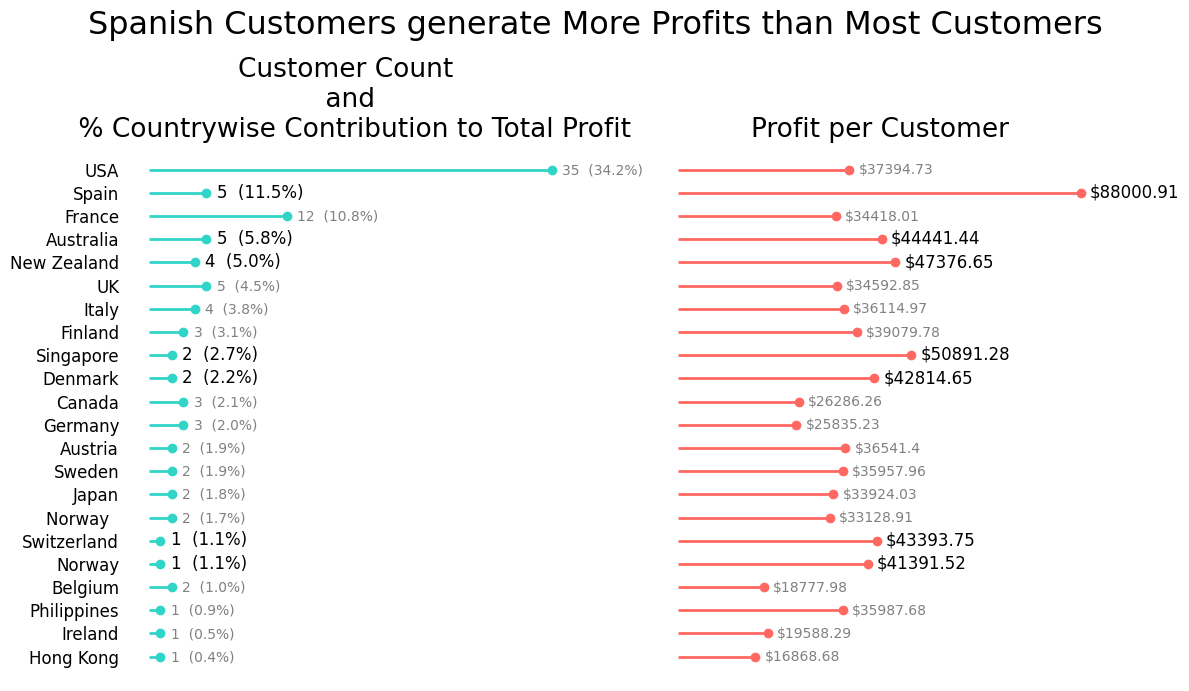

In [137]:
global_profit_report = pd.read_sql_query(
"""SELECT customers.country AS Country,
          COUNT(*) AS No_of_Customers,
          ROUND(SUM(customer_profit_report.profit),2) AS Profit_Earned,
          ROUND(SUM(customer_profit_report.profit)/COUNT(*),2) AS Profit_Per_Customer,
          ROUND((SUM(customer_profit_report.profit) * 100.0 / 
                                                            (SELECT SUM(profit)
                                                             FROM customer_profit_report)), 1) AS Profit_Percentage
     FROM customers
     JOIN customer_profit_report
       ON customers.customerNumber = customer_profit_report.customerNumber
    GROUP BY customers.country
    ORDER BY Profit_Earned;""", my_conn
)

fig = plt.figure(figsize=(12,7))

#Plot the customer count and profit generated in each country
ax1 = fig.add_subplot(1,2,1)
 
    #Remove spines
for each_key in ax1.spines.keys():
    ax1.spines[each_key].set_visible(False)
    
    #Plot Customer count
ax1.hlines(y=global_profit_report['Country'],
           xmin=0,
           xmax=global_profit_report['No_of_Customers'],
           color='#30D5C8',
           linewidth=2)
ax1.scatter(y=global_profit_report['Country'],
            x=global_profit_report['No_of_Customers'],
            color='#30D5C8')

    #Beautify plot
ax1.tick_params(axis='y',left=False,labelsize=12)
ax1.tick_params(axis='x',bottom=False,labelbottom=False)

    #Select specific values for annotation
big_spend_countries = [global_profit_report.iloc[i,0] for i in range(len(global_profit_report)) if global_profit_report.iloc[i,3]>40000]
size = [12 if global_profit_report.iloc[i,0]in big_spend_countries else 10 for i in range(len(global_profit_report)) ]
palette = ['black' if global_profit_report.iloc[i,0] in big_spend_countries else 'grey' for i in range(len(global_profit_report))]

    #Annotate plot
for i in range(len(global_profit_report)):
    ax1.text(s=str(global_profit_report.iloc[i,1])+'  '+'('+str(global_profit_report.iloc[i,4])+'%'+')',
             x=global_profit_report.iloc[i,1]+0.9,
             y=i-0.2,
             size=size[i],
             color=palette[i])
ax1.set_title('Customer Count \n and \n % Countrywise Contribution to Total Profit',size=19,loc='center')

#Plot Profit per customer
ax2 = fig.add_subplot(1,2,2)

    #Remove spines
for each_key in ax2.spines.keys():
    ax2.spines[each_key].set_visible(False)
    
    #Plot Profit per customer
ax2.hlines(y=global_profit_report['Country'],
           xmin=0,
           xmax=global_profit_report['Profit_Per_Customer'],
           color='#ff6961',
           linewidth=2)
ax2.scatter(y=global_profit_report['Country'],
            x=global_profit_report['Profit_Per_Customer'],
            color='#ff6961')

    #Beautify plot
ax2.tick_params(axis='y',left=False,labelsize=14,labelleft=False)
ax2.tick_params(axis='x',bottom=False,labelbottom=False)

    #Select specific values for annotation
size = [12 if global_profit_report.iloc[i,3]>40000 else 10 for i in range(len(global_profit_report)) ]
palette = ['black' if global_profit_report.iloc[i,3]>40000 else 'grey' for i in range(len(global_profit_report)) ]

    #Annotate plot
for i in range(len(global_profit_report)):
    ax2.text(s='$'+str(global_profit_report.iloc[i,3]),
             x=global_profit_report.iloc[i,3]+2000,
             y=i-0.2,
             size=size[i],
             color=palette[i])
ax2.set_title('Profit per Customer',size=19,loc='center')
#---
plt.suptitle("Spanish Customers generate More Profits than Most Customers", size=23,x=0.50)
plt.tight_layout()
plt.show()

In [140]:
global_profit_report.sort_values("Profit_Earned", ascending=False)

,Country,No_of_Customers,Profit_Earned,Profit_Per_Customer,Profit_Percentage
21,USA,35,1308815.59,37394.73,34.2
20,Spain,5,440004.54,88000.91,11.5
19,France,12,413016.12,34418.01,10.8
18,Australia,5,222207.18,44441.44,5.8
17,New Zealand,4,189506.58,47376.65,5.0
16,UK,5,172964.26,34592.85,4.5
15,Italy,4,144459.86,36114.97,3.8
14,Finland,3,117239.33,39079.78,3.1
13,Singapore,2,101782.55,50891.28,2.7
12,Denmark,2,85629.30,42814.65,2.2


**Insights**
- Clearly, the interest for model vehicles in countries like USA and France standout, more so in the USA than France.
- There are a number of countries of interest like Spain , Australia, Norway etc. that have very few customers but account for noteworthy customer spending.
- Australia, the U.K and France have zonal offices that manage more than 4 customers in their respective areas. However Japan has only 2 customers even though it hosts a zonal office in Tokyo.
- The Asian market is underrepresented considering that there are only 5 customers from 3 countries namely Japan, Singapore and the Philipines.
- Countries from South America and Africa are absent altogether.
- It is notable that while the USA is a major market, customers in Spain, Singapore and New Zealand spend more than customers in the US.

In [227]:
qry = """

SELECT customers.city AS City,
       ROUND(SUM(customer_profit_report.profit),2) AS Profit_Earned,
       ROUND((SUM(customer_profit_report.profit) * 100.0 / 
                          (SELECT SUM(profit)
                             FROM customer_profit_report)), 2) AS Percentage
  FROM customers
  JOIN customer_profit_report
    ON customers.customerNumber = customer_profit_report.customerNumber
  GROUP BY customers.city
 ORDER BY Profit_Earned DESC;

"""
df = pd.read_sql_query(qry, my_conn)
df.head(10)

,City,Profit_Earned,Percentage
0,Madrid,394665.35,10.32
1,San Rafael,236769.39,6.19
2,NYC,198386.26,5.19
3,Auckland,111785.49,2.92
4,Paris,101796.48,2.66
5,Singapore,101782.55,2.66
6,San Francisco,83766.71,2.19
7,New Bedford,76022.19,1.99
8,Nantes,70939.10,1.85
9,Melbourne,70311.07,1.84


- Above we can see the top 10 cities, that are generating the highest profit.

## Favorite Category

**The best and worst product lines in different countries**

Our clients have requested us to identify the best and worst performing product lines for each of the countries our customers come from.

There is a lack of clarity with regards to the parameter to judge the best and worst of product lines. Since we are allowed to make assumptions we shall go with the quantity of the product line being ordered. Based on the representation of the product lines in the order details we shall find out which product lines are the best and worst in each country.

In [141]:
qry = """


WITH
 
order_category AS(
SELECT orderdetails.orderNumber,
       products.productLine
  FROM products
  JOIN orderdetails
    ON products.productCode=orderdetails.productCode
),


country_order AS(
SELECT customers.country,
       orders.orderNumber
  FROM orders
  JOIN customers
    ON orders.customerNumber=customers.customerNumber
),


country_category AS(
SELECT country_order.country AS Country,
       order_category.productLine AS Category
  FROM country_order
  JOIN order_category
    ON country_order.orderNumber=order_category.orderNumber
),


country_category_count AS(
SELECT Country,
       Category,
       COUNT(Category) AS category_count
  FROM country_category
 GROUP BY Country,Category
)


SELECT Country,
       (SELECT Category
          FROM country_category_count
         GROUP BY Country
        HAVING Country=c.Country AND category_count=MAX(category_count)) AS Best_Category,
       (SELECT Category
          FROM country_category_count
         GROUP BY Country
        HAVING Country=c.Country AND category_count=MIN(category_count)) AS Worst_Category
  FROM country_category_count c
 GROUP BY Country


/*SELECT MAX(category_count)
  FROM (SELECT COUNT(Category) AS category_count
          FROM country_category
         GROUP BY Category
        HAVING country = 'USA')*/
/*SELECT Country,
       Category,
       COUNT(Category) AS category_count
  FROM country_category
 GROUP BY Country,Category*/

"""
df = pd.read_sql_query(qry, my_conn)
df

,Country,Best_Category,Worst_Category
0,Australia,Vintage Cars,Trains
1,Austria,Classic Cars,Ships
2,Belgium,Vintage Cars,Planes
3,Canada,Trucks and Buses,Motorcycles
4,Denmark,Classic Cars,Planes
5,Finland,Classic Cars,Trains
6,France,Classic Cars,Trains
7,Germany,Classic Cars,Ships
8,Hong Kong,Planes,Motorcycles
9,Ireland,Classic Cars,Trucks and Buses


**Insights**:
- Classics Cars is the product line most preferred in almost all countries while Trains are the least preferred.
- Switzerland seems to show that Classic Cars are its best and worst lines but this has appeared because this is the only line ordered by the Swiss.

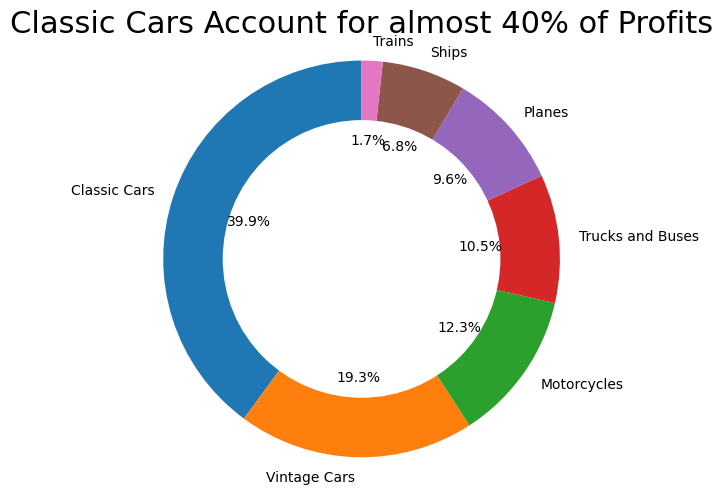

In [142]:
product_line_profit = pd.read_sql_query(
"""SELECT products.productLine AS Product_Category,
          ROUND(SUM((orderdetails.priceEach-products.buyPrice)*orderdetails.quantityOrdered),2) AS Profits_by_Category,
          ROUND((SUM((orderdetails.priceEach-products.buyPrice)*orderdetails.quantityOrdered)* 100.0 / 
                                                                              (SELECT SUM(profit)
                                                                                 FROM customer_profit_report)), 2) AS Percentage
     FROM orderdetails
     JOIN products
       ON orderdetails.productCode=products.productCode
    GROUP BY Product_Category
    ORDER BY Profits_by_Category DESC;""", my_conn)

# Pie chart
labels = product_line_profit['Product_Category']
sizes = product_line_profit['Percentage']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

#Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
ax1.set_title("Classic Cars Account for almost 40% of Profits",size=22)
plt.show()

**Insights**
- Just as seen earlier Classic Cars are the most sold product line and Trains are the least favoured.
- Vintage Cars makes up for nearly one-fifth of the total profits earned by the company.

## Monthly Profits Performance
**Analysing how profits perform over two years**

Monthly sales performance can be viewed from multiple perspectives. We could look at it from a sales perspective i.e the number of individual orders processed on a monthly basis or the cumulative total of all orders each month.

However, since we are talking about performance we shall focus on monthly sales performance based on the profits we have been making during each month. The more the profits for a month, the better the month has been. Loss indicates a bad month.

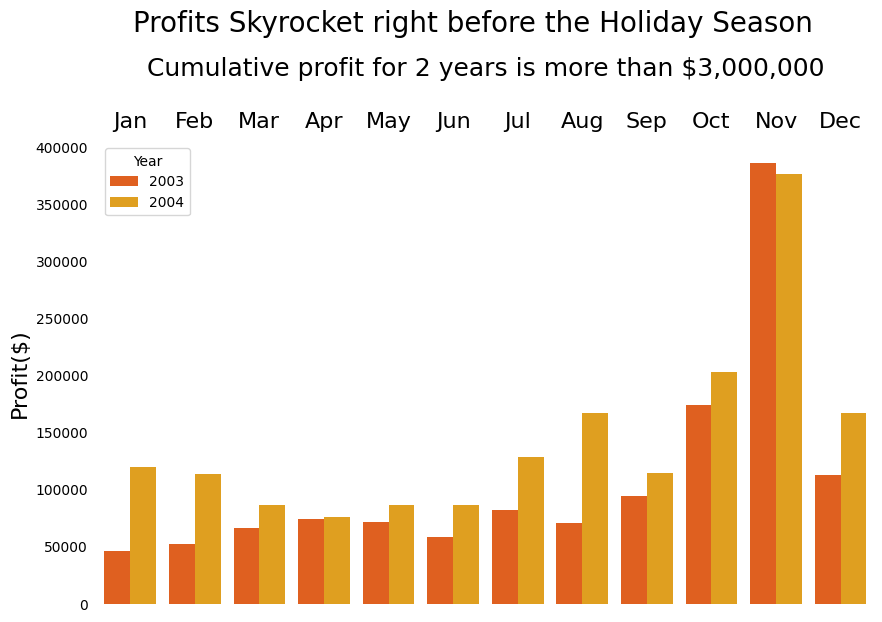

In [165]:
#Profit by Month and Year
monthly_profit_report = pd.read_sql_query(
"""SELECT CAST(SUBSTR(orderDate,1,4) AS INT)*100+CAST(SUBSTR(orderDate,6,7) AS INT) AS Year_Month,
       CAST(SUBSTR(orderDate,1,4) AS INT) AS Year,
       CAST(SUBSTR(orderDate,6,7) AS INT) AS Month,
       ROUND(SUM(Order_Profit),2) AS Profit
  FROM shipped_orders
 GROUP BY Year_Month
HAVING Year_Month < 200501""", my_conn)

#print(monthly_profit_report['Profit'].sum())
plt.figure(figsize=(10,6))

# Defining the barplot
ax = sns.barplot(x = 'Month', 
                 y = 'Profit',
                 hue = 'Year',
                 data = monthly_profit_report,
                 palette = 'autumn', 
                 orient = 'v')

# Removing spines and set ticks
ax.xaxis.tick_top()
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

    #Beautify plot
ax.tick_params(left=False, bottom=False,top=False,labelbottom=False)
ax.set_xticklabels(['Jan','Feb','Mar','Apr',
                    'May','Jun','Jul','Aug',
                    'Sep','Oct','Nov','Dec'],size=16)
ax.set_xlabel(None)
ax.set_ylabel("Profit($)", size=16)

plt.suptitle("Profits Skyrocket right before the Holiday Season", size=20,x=0.50, y=1.1)
ax.set_title('Cumulative profit for 2 years is more than $3,000,000\n',size=18,loc='center')
plt.show()

In [157]:
monthly_profit_report

,Year_Month,Year,Month,Profit
0,200301,2003,1,45820.95
1,200302,2003,2,51980.32
2,200303,2003,3,66103.02
3,200304,2003,4,73846.81
4,200305,2003,5,71586.99
5,200306,2003,6,58229.57
6,200307,2003,7,82073.59
7,200308,2003,8,70195.88
8,200309,2003,9,93855.53
9,200310,2003,10,174281.84


**Insights**:
- During 2003 and 2004 the company not seen any loss
- In 2003 profits never went beyond \$100,000 on a monthly basis till right before the holiday season when it soared to more than 5 times it monthly average in Novemeber.
- 2004 in comparison to 2003 was a much better year. Right from the beginning of the year profits soared to beyond \$100,000 and gradually dropped during the subsequent months to soar significantly higher during the holiday season. However it must be noted that sales during November were slighly less than 2003. That lost was however made up for through the profits generated during December 2004.
- Overall performance during the course of 2003 and 2004 seem quite healthy considering profits of \$3,000,000 for two years.
- However, this figure must be taken with a pinch of salt as it does not consider other operational costs that may have been incurred during the same time period due to lack of data.

## Salemen performance
**Analysing the performance of salesmen**

Vehicle Models have a plan to expand their sales staff, however they are keen to find out the performance of their current staff. They have recently noticed a slump in new customers and believe that the performance of the sales team might have something to do with it.

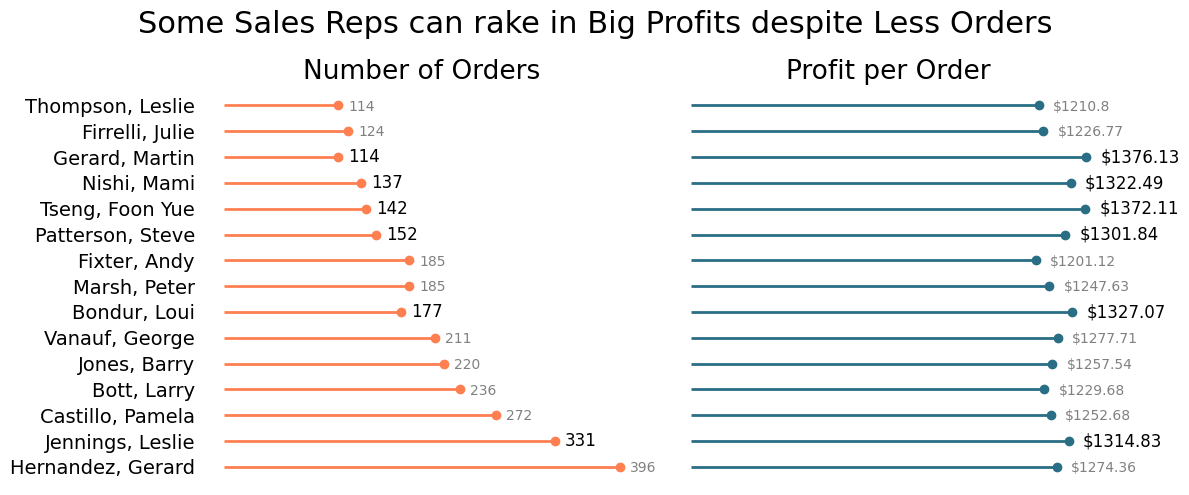

In [196]:
qry = """

SELECT employees.lastName||', '||employees.firstName AS Sales_Rep_Name,
       offices.territory,
       offices.city,
       SUM(customer_profit_report.no_of_orders) AS No_of_Orders,
       ROUND(SUM(customer_profit_report.profit)/SUM(customer_profit_report.no_of_orders),2) AS Profit_per_Order,
       ROUND(SUM(customer_profit_report.profit),2) AS Profit_Earned,
       ROUND((SUM(customer_profit_report.profit) * 100.0 / 
                          (SELECT SUM(profit)
                             FROM customer_profit_report)), 2) AS Percentage
   FROM customers
   JOIN customer_profit_report
     ON customers.customerNumber = customer_profit_report.customerNumber
   JOIN employees
     ON customers.salesRepEmployeeNumber = employees.employeeNumber
   JOIN offices
     ON employees.officeCode=offices.officeCode
  GROUP BY employees.employeeNumber
  ORDER BY Profit_Earned DESC;

  """
sales_rep_performance_report = pd.read_sql_query(qry, my_conn)

fig = plt.figure(figsize=(12,5))

#Plot number of orders
ax1 = fig.add_subplot(1,2,1)
    
    #Remove spines
for each_key in ax1.spines.keys():
    ax1.spines[each_key].set_visible(False)
    
    #Plot
ax1.hlines(y=sales_rep_performance_report['Sales_Rep_Name'],
           xmin=0,
           xmax=sales_rep_performance_report['No_of_Orders'],
           color='#FF7F50',
           linewidth=2)
ax1.scatter(y=sales_rep_performance_report['Sales_Rep_Name'],
            x=sales_rep_performance_report['No_of_Orders'],
            color='#FF7F50')
    
    #Beautify plot
ax1.tick_params(bottom=False,left=False,labelbottom=False,labelsize=14)
    
    #Select data to highlight
good_reps = [sales_rep_performance_report.iloc[i,0] for i in range(len(sales_rep_performance_report)) if sales_rep_performance_report.iloc[i,4]>1280]
size = [12 if sales_rep_performance_report.iloc[i,0] in good_reps else 10 for i in range(len(sales_rep_performance_report)) ]
palette = ['black' if sales_rep_performance_report.iloc[i,0] in good_reps else 'grey' for i in range(len(sales_rep_performance_report)) ]

    #Annotate plot
for i in range(len(sales_rep_performance_report)):
    ax1.text(s=str(sales_rep_performance_report.iloc[i,3]),
             x=sales_rep_performance_report.iloc[i,3]+10,
             y=i-0.2,
             size=size[i],
             color=palette[i])
ax1.set_title('Number of Orders',size=19,loc='center')

#Plot profit per order
ax2 = fig.add_subplot(1,2,2)

    #Remove spines
for each_key in ax2.spines.keys():
    ax2.spines[each_key].set_visible(False)
    
    #Plot
ax2.hlines(y=sales_rep_performance_report['Sales_Rep_Name'],
           xmin=0,
           xmax=sales_rep_performance_report['Profit_per_Order'],
           color='#296E85',
           linewidth=2)
ax2.scatter(y=sales_rep_performance_report['Sales_Rep_Name'],
            x=sales_rep_performance_report['Profit_per_Order'],
            color='#296E85')

    #Beautify plot
ax2.tick_params(bottom=False,left=False,
                labelbottom=False,labelleft=False)
    
    #Select data to highlight
size = [12 if sales_rep_performance_report.iloc[i,4]>1280 else 10 for i in range(len(sales_rep_performance_report))]
palette = ['black' if sales_rep_performance_report.iloc[i,4]>1280 else 'grey' for i in range(len(sales_rep_performance_report)) ]

    #Annotate plot
for i in range(len(sales_rep_performance_report)):
    ax2.text(s='$'+str(sales_rep_performance_report.iloc[i,4]),
             x=sales_rep_performance_report.iloc[i,4]+50,
             y=i-0.2,
             size=size[i],
             color=palette[i])
ax2.set_title('Profit per Order',size=19,loc='center')
#---
plt.suptitle("Some Sales Reps can rake in Big Profits despite Less Orders", size=22,x=0.50)
plt.tight_layout()
plt.show()

In [195]:
sales_rep_performance_report

,Sales_Rep_Name,territory,city,No_of_Orders,Profit_per_Order,Profit_Earned,Percentage
0,"Hernandez, Gerard",EMEA,Paris,396,1274.36,504644.71,13.19
1,"Jennings, Leslie",NA,San Francisco,331,1314.83,435208.35,11.38
2,"Castillo, Pamela",EMEA,Paris,272,1252.68,340727.90,8.91
3,"Bott, Larry",EMEA,London,236,1229.68,290203.59,7.59
4,"Jones, Barry",EMEA,London,220,1257.54,276659.25,7.23
5,"Vanauf, George",NA,NYC,211,1277.71,269596.09,7.05
6,"Bondur, Loui",EMEA,Paris,177,1327.07,234891.07,6.14
7,"Marsh, Peter",APAC,Sydney,185,1247.63,230811.75,6.03
8,"Fixter, Andy",APAC,Sydney,185,1201.12,222207.18,5.81
9,"Patterson, Steve",NA,Boston,152,1301.84,197879.23,5.17


**Insights**
- While Gerard Hernandez did bring in the most profits and the most number of orders. The average profit per order is comparatively less.
- Martin Gerarad, on the other hand, has earned comparatively less profit and bought in lesser orders. However, it must be noted that the profit per order is the highest when compared to all other salesmen.
- Collectively, salesmen in the European territory are doing better in sales than their American and Japanese counterparts. In fact, of the top 5 salesmen, four are from the European territory. In addition, Martin Gerard, the sales rep with the most profit per order comes from the European territory.

**Analysing whether budget must be allocated to gain new customers**

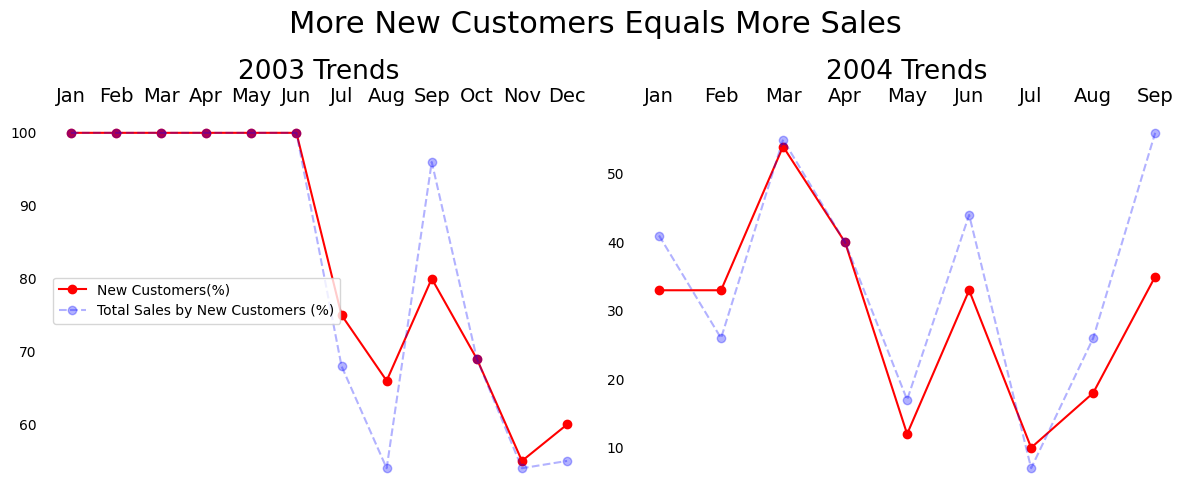

In [201]:
new_customer_report = pd.read_sql_query(
'''WITH
payment_year_month AS(
SELECT *, 
       CAST(SUBSTR(paymentDate, 1,4) AS INTEGER)*100 + CAST(SUBSTR(paymentDate, 6,7) AS INTEGER) AS year_month
  FROM payments
),

monthly_payment_report AS(
SELECT year_month,
       COUNT(DISTINCT customerNumber) AS number_of_customers,
       SUM(amount) AS monthly_total
  FROM payment_year_month
 GROUP BY year_month
),

new_customers_report AS(
SELECT year_month AS Month,
       COUNT(DISTINCT customerNumber) AS number_of_new_customers,
       SUM(amount) AS new_customer_monthly_total,
       (SELECT number_of_customers
          FROM monthly_payment_report
         WHERE year_month = p1.year_month) AS total_customers_that_paid,
       (SELECT monthly_total
          FROM monthly_payment_report
         WHERE year_month = p1.year_month) AS total_amount_paid
  FROM payment_year_month p1
 WHERE customerNumber NOT IN (SELECT customerNumber
                                FROM payment_year_month p2
                               WHERE p2.year_month < p1.year_month)
 GROUP BY year_month
)

SELECT Month AS Month,
       ROUND(number_of_new_customers*100/total_customers_that_paid) AS Percentage_New_Customers,
       ROUND(new_customer_monthly_total*100/total_amount_paid) AS Percentage_Paid_by_New_Customers
  FROM new_customers_report''',my_conn
)

#Plot 2003 data
data1=new_customer_report[new_customer_report['Month'].between(200301,200312)]
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)

    #Remove spines
for each_key in ax1.spines.keys():
    ax1.spines[each_key].set_visible(False)

    #Set x axis to the top
ax1.xaxis.tick_top()
ax1.tick_params(bottom=False,left=False,top=False,labeltop=True)

    #Beautify plot
ax1.set_xticks(data1['Month'])
months= ['Jan','Feb','Mar','Apr',
         'May','Jun','Jul','Aug',
         'Sep','Oct','Nov','Dec']
ax1.set_xticklabels(months,size=14)

    #Create plot
plt.plot('Month',
         'Percentage_New_Customers',
         data=data1,marker='o',color='red',label='New Customers(%)')

plt.plot('Month',
         'Percentage_Paid_by_New_Customers',
         data=data1,marker='o',color='blue',linestyle='--',alpha=0.3,label="Total Sales by New Customers (%)")
ax1.legend(loc='center left')
ax1.set_title('2003 Trends',size=19,loc='center')

#Plot 2004 data
data2=new_customer_report[new_customer_report['Month'].between(200401,200412)]
ax2 = fig.add_subplot(1,2,2)

    #Remove spines
for each_key in ax2.spines.keys():
    ax2.spines[each_key].set_visible(False)

    #Set x axis to the top
ax2.xaxis.tick_top()
ax2.tick_params(bottom=False,left=False,top=False,
                labeltop=True,labelleft=True)

    #Beautify plot
ax2.set_xticks(data2['Month'])
months2 = ['Jan','Feb','Mar','Apr',
           'May','Jun','Jul','Aug',
           'Sep']
ax2.set_xticklabels(months2,size=14)

    #Plot
plt.plot('Month',
         'Percentage_New_Customers',
         data=data2,marker='o',color='red')
plt.plot('Month',
         'Percentage_Paid_by_New_Customers',
         data=data2,marker='o',color='blue',linestyle='--',alpha=0.3)
ax2.set_title('2004 Trends',size=19,loc='center')
#---
plt.suptitle("More New Customers Equals More Sales", size=22,x=0.50)
plt.tight_layout()
plt.show()

In [214]:
new_customer_report

,Month,Percentage_New_Customers,Percentage_Paid_by_New_Customers
0,200301,100.0,100.0
1,200302,100.0,100.0
2,200303,100.0,100.0
3,200304,100.0,100.0
4,200305,100.0,100.0
5,200306,100.0,100.0
6,200307,75.0,68.0
7,200308,66.0,54.0
8,200309,80.0,96.0
9,200310,69.0,69.0


**Insights**
- Sales is clearly driven by the number of new customers. 
- This effect of new customers on sales in some cases seems exponential. This is specifically highlighted during the months of Aug and Sep of 2003 and the months of Feb and Jun of 2004.
- The months of Jan and Feb during 2004 prove to be an exception because despite having the same number of new percentage of new customer for both months, sales went up and subsequetly down. This may have been because it was the beginning of the year.
- Since September 2004 there has been no new customers which is a worrying sign for 2005.

In [213]:
qry = """

WITH
  profit_gen_table AS (
    SELECT os.customerNumber, SUM(quantityOrdered * (priceEach - buyPrice)) AS prof_gen  
      FROM products pr
	  JOIN orderdetails od
	    ON pr.productCode = od.productCode
	  JOIN orders os
	    ON od.orderNumber = os.orderNumber
     GROUP BY os.customerNumber
  )
	SELECT *
	  FROM customers cust
	  LEFT JOIN profit_gen_table pg
	    ON pg.customerNumber = cust.customerNumber
    WHERE prof_gen IS NULL

"""
df = pd.read_sql_query(qry, my_conn)
df
# Dead customers 

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,customerNumber,prof_gen
0,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,None,Warszawa,None,01-012,Poland,NaN,0,None,None
1,168,American Souvenirs Inc,Franco,Keith,2035557845,149 Spinnaker Dr.,Suite 101,New Haven,CT,97823,USA,1286.0,0,None,None
2,169,Porto Imports Co.,de Castro,Isabel,(1) 356-5555,Estrada da saúde n. 58,None,Lisboa,None,1756,Portugal,NaN,0,None,None
3,206,"Asian Shopping Network, Co",Walker,Brydey,+612 9411 1555,Suntec Tower Three,8 Temasek,Singapore,None,038988,Singapore,NaN,0,None,None
4,223,Natürlich Autos,Kloss,Horst,0372-555188,Taucherstraße 10,None,Cunewalde,None,01307,Germany,NaN,0,None,None
5,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",None,Madrid,None,28001,Spain,NaN,0,None,None
6,247,Messner Shopping Network,Messner,Renate,069-0555984,Magazinweg 7,None,Frankfurt,None,60528,Germany,NaN,0,None,None
7,273,"Franken Gifts, Co",Franken,Peter,089-0877555,Berliner Platz 43,None,München,None,80805,Germany,NaN,0,None,None
8,293,BG&E Collectables,Harrison,Ed,+41 26 425 50 01,Rte des Arsenaux 41,None,Fribourg,None,1700,Switzerland,NaN,0,None,None
9,303,Schuyler Imports,Schuyler,Bradley,+31 20 491 9555,Kingsfordweg 151,None,Amsterdam,None,1043 GR,Netherlands,NaN,0,None,None


**Insights**
- From the above result we can see the list of customers who have not purchased any product, and 21 out of 23 customers have not got assigned any salesperson. That also can be the reason for no purchasing from those customers. We should assign salespersons for each of those customers as soon as possible and we could connect with them and ask about their needs, preferences, and requirements.

## Dead Stocks to remove
**Identifying items that have not sold out**

[Deadstock](https://www.zoho.com/inventory/guides/dead-stock-definition-cause-and-solution.html) are products that have never been sold for a long time. They tend to be a cost because of the space they take up and could end up being a loss if they are dealt with because of the damage they may incur. This may cause it go completely unsold.

We shall identify items that have not been sold for one year and the cost incurred by the same.

In [202]:
qry = """

WITH
orders_year_month AS(
SELECT *, 
       CAST(SUBSTR(orderDate,1,4) AS INTEGER)*100 + CAST(SUBSTR(orderDate,6,7) AS INTEGER) AS year_month
  FROM orders
),

last_six_months_orders AS(
SELECT DISTINCT orderdetails.productCode
  FROM orderdetails
  JOIN orders_year_month
    ON orderdetails.orderNumber = orders_year_month.orderNumber
 WHERE orders_year_month.year_month BETWEEN 200405 AND 200505
)

SELECT products.productName AS Product,
       products.quantityinStock AS Stock_Quantity,
       ROUND(products.buyPrice * products.quantityinStock,2) AS Cost
  FROM products
 WHERE productCode NOT IN (SELECT productCode
                             FROM last_six_months_orders);

"""
df = pd.read_sql_query(qry, my_conn)
df

,Product,Stock_Quantity,Cost
0,1985 Toyota Supra,7733,440858.33


**Insights**
- This car has not seen any demand for one year. The cost incurred by it is also significant.

## Recommendations

After having analysed the data based on the queries put forward by the Vehicle Model Company, the following are the recommendations that we could make based on the insights we have gained.

**On customers**
- Loyal customers need to be rewarded. It would be good to start a loyalty program, if one is not in place, to ensure continued business and encourage bigger orders.
- Focus on getting existing customers to buy more because currently monthly sales seem to be more dependant on the acquisition of new customers which can be a costly affair.
- Till we can get existing customers to buy more, focus on getting new customers to keep the monthly sales numbers up. It was noticed that there were no new customers based on the existing data since Sep 2004 which should be of concern since they contribute to a lot of the current sales.

**On Sales reps**
- In general sales reps seems to be doing a good job. However some are doing an even better job by encouraging customers to buy more and thus increasing profits on each order. 
- Sales reps must be motivated to encourage customers in their region to buy more in a single order in addition to increasing orders from customers.
- Sales reps in the US must do more to boost customer confidence in their region. Considering that the region has a number of zonal offices and market knowledge is readily available, the sales team should be able to find out what is keeping their customers from buying more. This recommnedation is being put forward taking in to consideration that the sales in the region is comparatively lower than the European region.

**On Existing and Potential Markets**
- The markets in the Asian region seem to be relatively unexplored. Given the rise of tech and a market boom, there are likely to be many customers willing to spend money on models atleast as a hobby.
- It would be a good investment to consider some serious expansion in to the European markets. There are many countries in European region like Spain, Norway and Switzerland that have the money and willing to spend more per order. This also holds true for Asian markets like Singapore.

**On Products**
- Classic and Vintage car models seem to be the most popular product lines which is good. It may be helpful to associate these models to some history related to them and increase their value, thus creating more demand for them.
- It would be best to create further categorisation than the existing product line to understand why certain product lines are not so favoured. While it is true that Trains are the least favourite product lines. It may not be the case for all Train related products. Better sub-classification possibly based on their year of making or date could help to find out how customers prefer their models.
- While it good to know that there is only one product which can be considered as Deadstock, it is inadvisable to keep holding on to it considering the dent it is putting on profits. It could be considered as an add-on while selling other products to get rid of the stock and recover some part of the costs. Action against the product must be taken as soon as possible otherwise the loss due to damage might be severe.
- If it is possible and the budget allows for the same, the company should consider other types of product besides model vehilces such as stickers, action figures, toys etc. that could help them in expanding their business.

**In general**
- The Marketing and Finance team need to take a look at this report before fully taking this to heart. Any assumptions made in this report have been made without input from these teams so some of them may be wrong e.g. overall profit for the years 2003 and 2004 are sligthly more than \$3,000,000. This estimation has been made without considering overhead costs like fees, replacement fees, refunds etc.

- We would recommend the collection of more data for better analysis in the future. Data related to the following would be helpful
    - Data related to overhead costs related to each order including fees and discounts
    - Data associated to credits or refunds for damaged goods
    - Customer end sales data to understand how the end customer relates to our product. This data could help the company salesmen to persuade their customers to buy more by showing end customer behavior.

## Conclusion

Collecting models of vehilcles is a hobby. Therefore getting them sold can be a difficult sell. Vehicles Models Company is fictitious company that specializes in this endeavour. In this project we were required to analyse their database and gather insights regarding questions they had about their business.

We did analyse their data and were able to extract insights. Based on what we've seen the company has a healthy outlook in general. They are able to bring in consistent profits and their salesmen do a good job in ensuring that their profit stream is healthy. While their current choice of markets is small, they have significant oppurtunities to expand and grow and this has been highlighted in our recommendations. We have also recommended that they collect additional data about other aspects of the business which should help us in better data analysis in the future.